#Description

##Context
The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.



##Objective
Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

##Data Description

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College (refers to college student), Post-Graduate, Doctorate
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank (in months)
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio: Average Card Utilization Ratio


In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/My Drive/python intro/creditcard/BankChurners.csv")
df=data.copy()

Mounted at /content/drive


#Data Overview

In [ ]:
# print first five rows
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# print last five rows
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


**Observations:**

The dataset provides customer demographics, banking activity, and financial details, including credit limits, transaction behavior, and account status (Existing or Attrited).

Key indicators such as credit utilization, total transactions, revolving balance, and relationship duration help assess customer engagement, credit risk, and attrition likelihood.

In [ ]:
# Inspecting the Dataset Dimensions
df.shape

(10127, 21)

**Observations:**
* There are 10127 rows and 21 colums in the dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

 **Observations**  

- The dataset contains **10,127 entries** and **21 columns**, covering customer demographics, banking activity, and financial behavior.  
- **Data types**:  
  - **6 categorical columns** (`object` type)  
  - **10 integer columns** (`int64` type)  
  - **5 float columns** (`float64` type)  

 **Missing Values:**  
- **Education_Level** has **1,519 missing values** (8608 non-null).  
- **Marital_Status** has **749 missing values** (9378 non-null).  

 **Key Financial & Behavioral Metrics:**  
- **Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy** indicate credit availability and usage.  
- **Total_Trans_Amt, Total_Trans_Ct** track customer spending and transaction frequency.  
- **Avg_Utilization_Ratio** measures credit utilization, which impacts credit risk assessment.  
- **Months_Inactive_12_mon & Contacts_Count_12_mon** help analyze customer engagement and potential attrition risks.  



In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,NaN,NaN,NaN,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000


**Observations**  

- The dataset contains **10,127 customers**, mostly **Existing Customers (8,500)**.  
- **Average customer age** is **46 years**, with more **female customers (5,358)**.  
- **Missing values** in **Education_Level (1,519)** and **Marital_Status (749)**.  
- **Most common income category**: **Less than $40K (3,561 customers)**.  
- **Average credit limit**: **$8,631**, with high variance.  
- **Average transaction amount**: **$4,404**, with some customers making very few transactions.  
- **Inactive months (last 12 months)**: **2.34 months on average**, indicating potential attrition risk.  
- **Credit utilization varies**, with some customers using almost **100% of their limit**.  


###Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

**Observations:**
* There are no duplicate entries in the DataFrame, and no further action is needed regarding duplicates.

###Checking for missing values

In [ ]:
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


**Observations**  

- The dataset has **missing values in two columns**:  
  - **Education_Level**: **1,519 missing values**  
  - **Marital_Status**: **749 missing values**  
- All other columns have **complete data** with no missing values.  




In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

##Exploratory Data Analysis

**Univariate analysis**

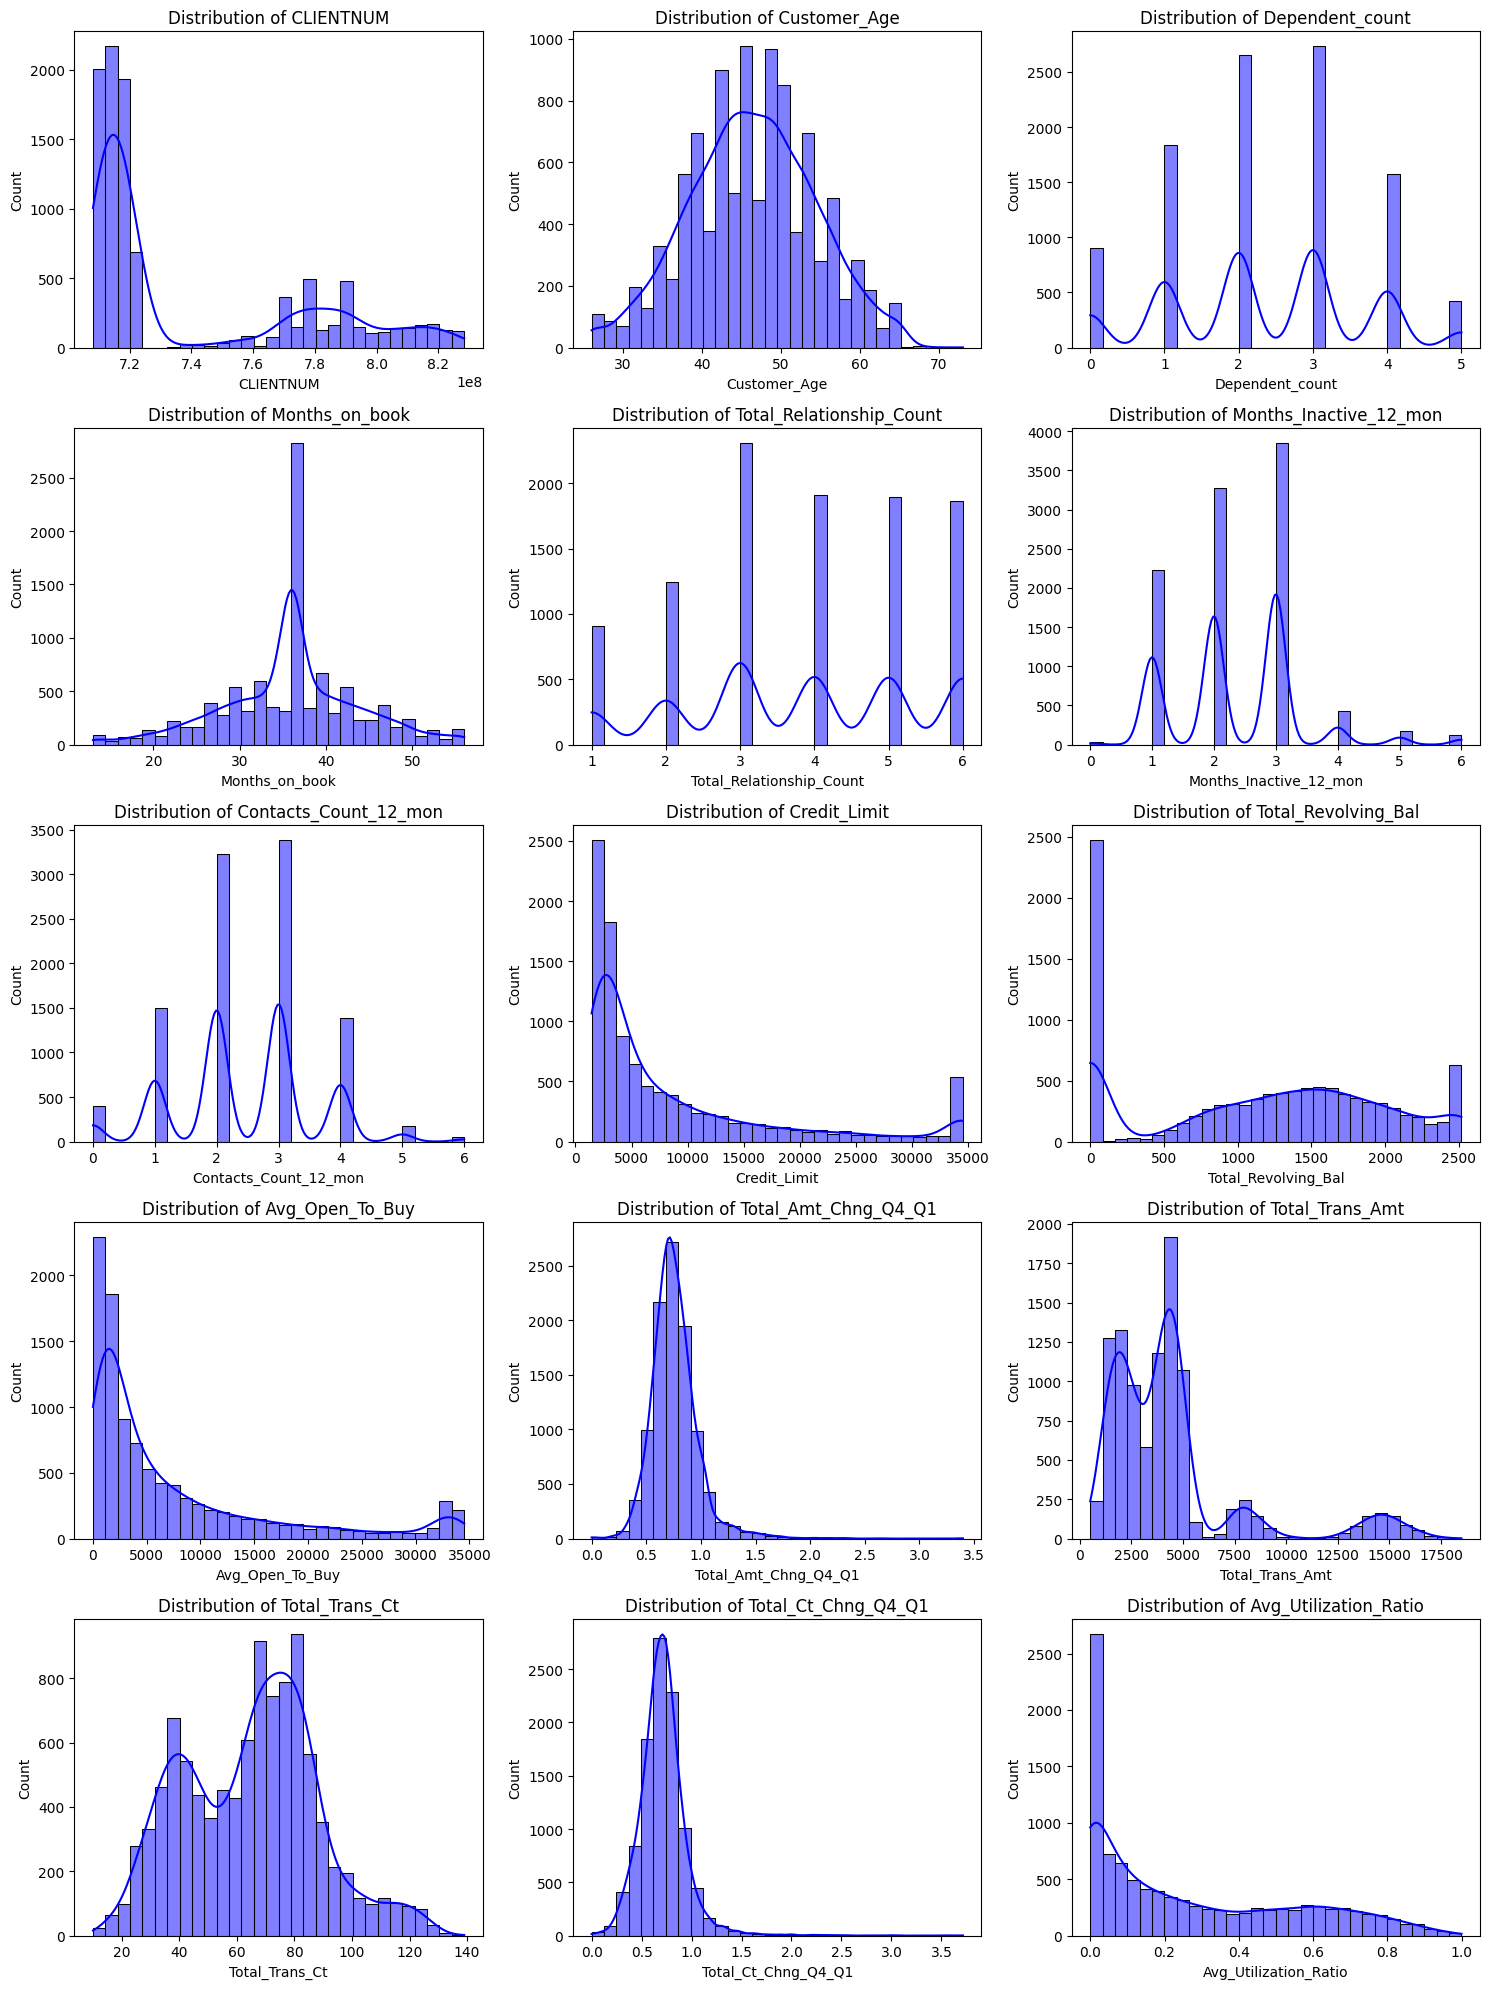

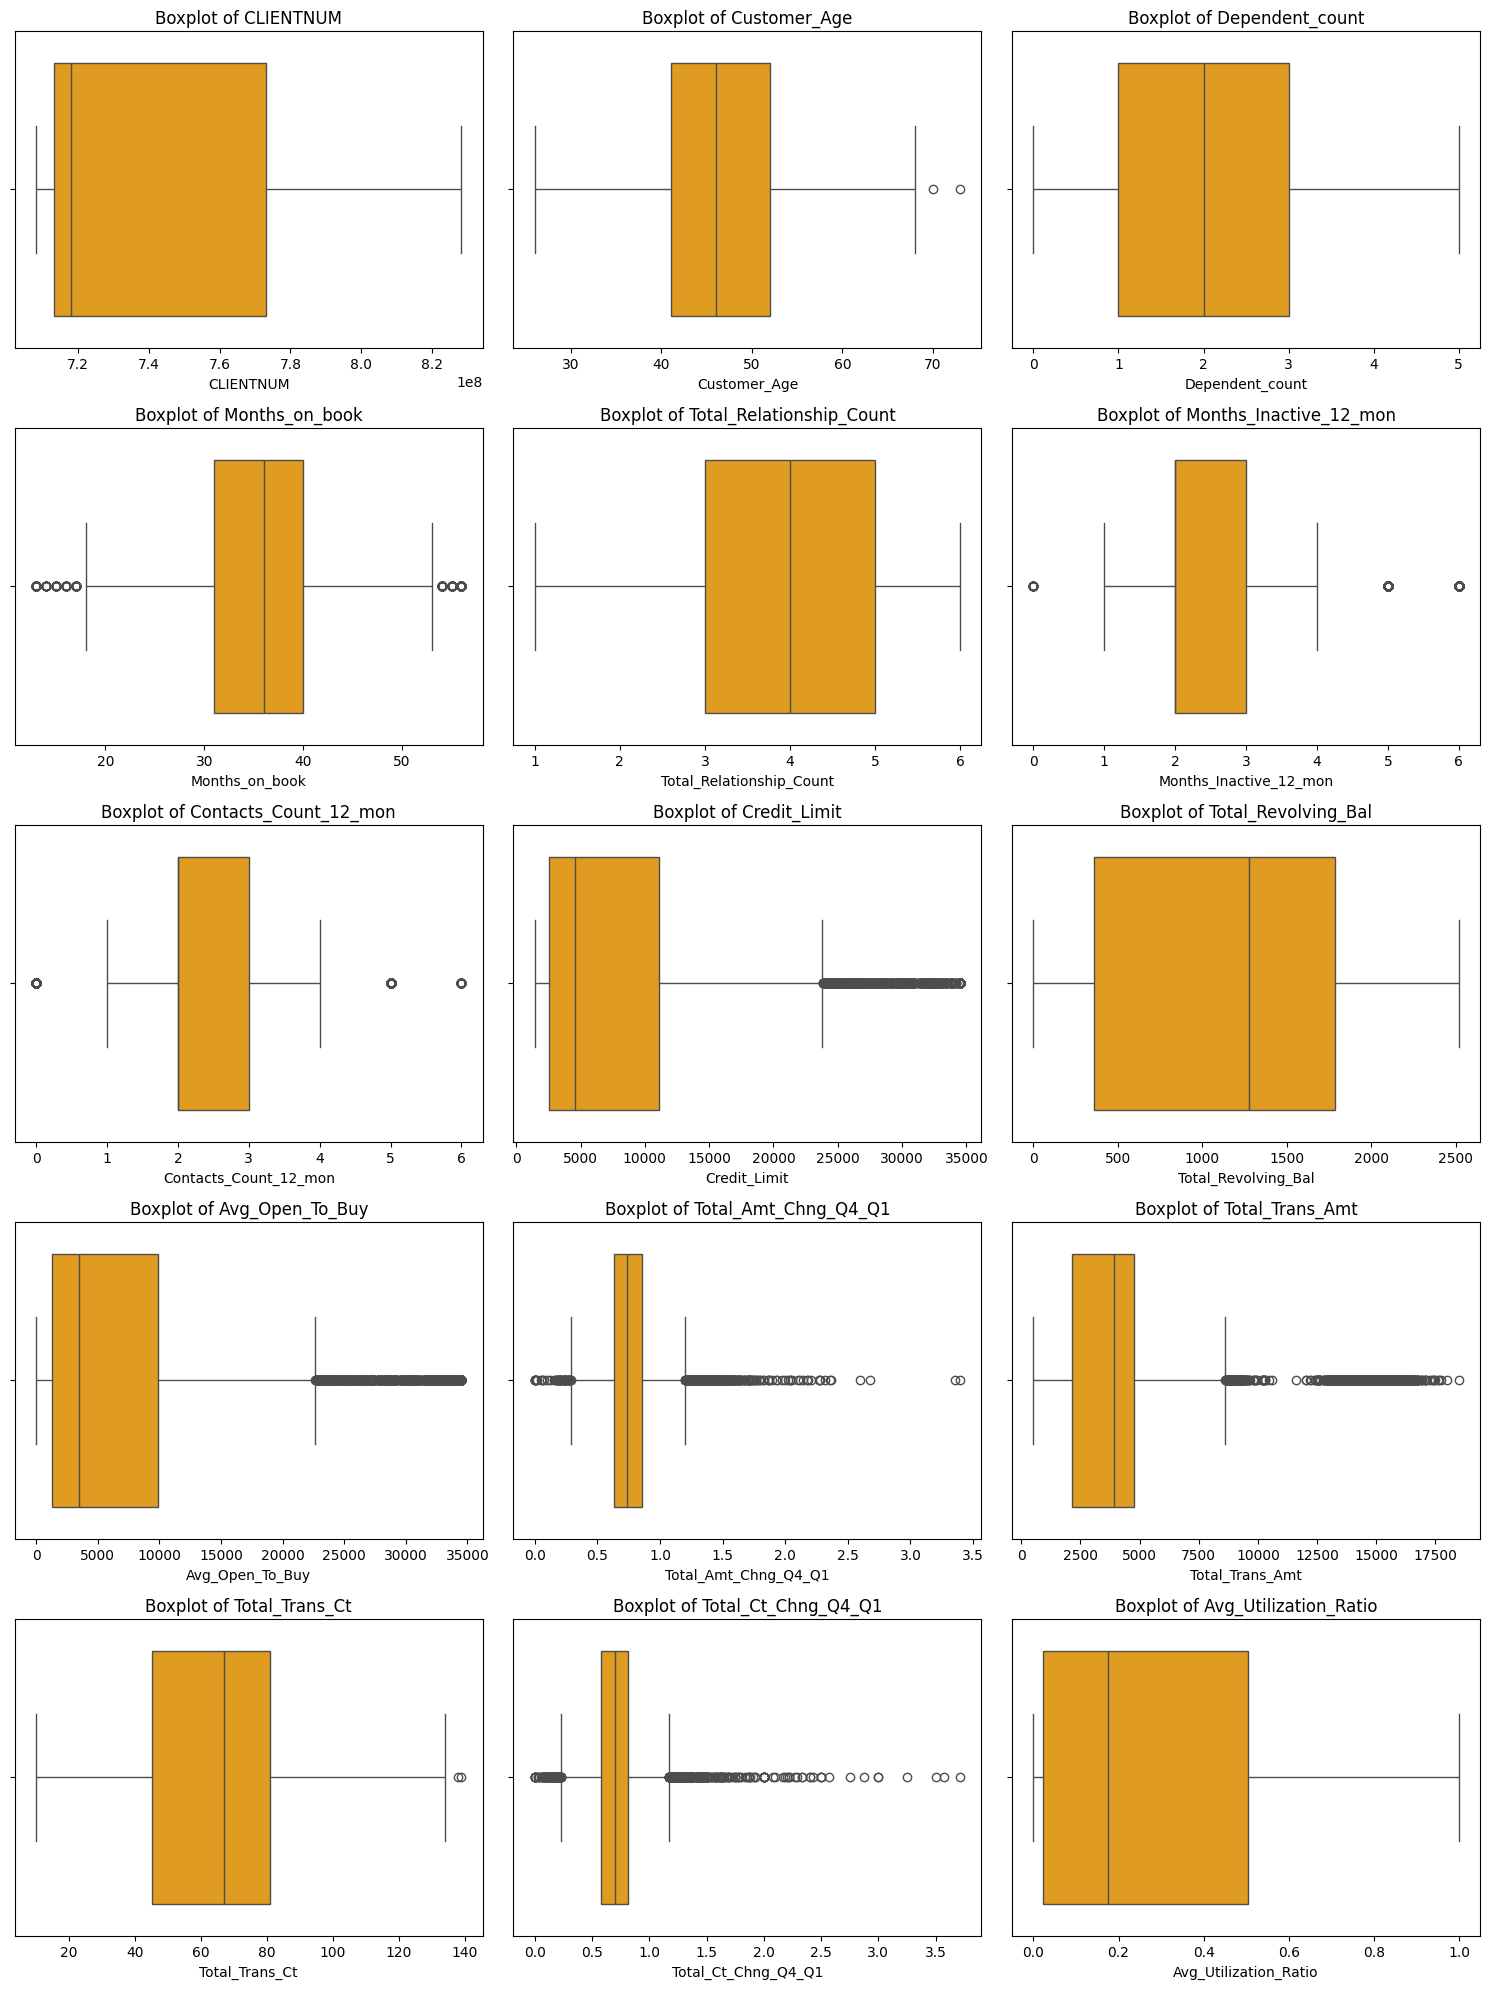

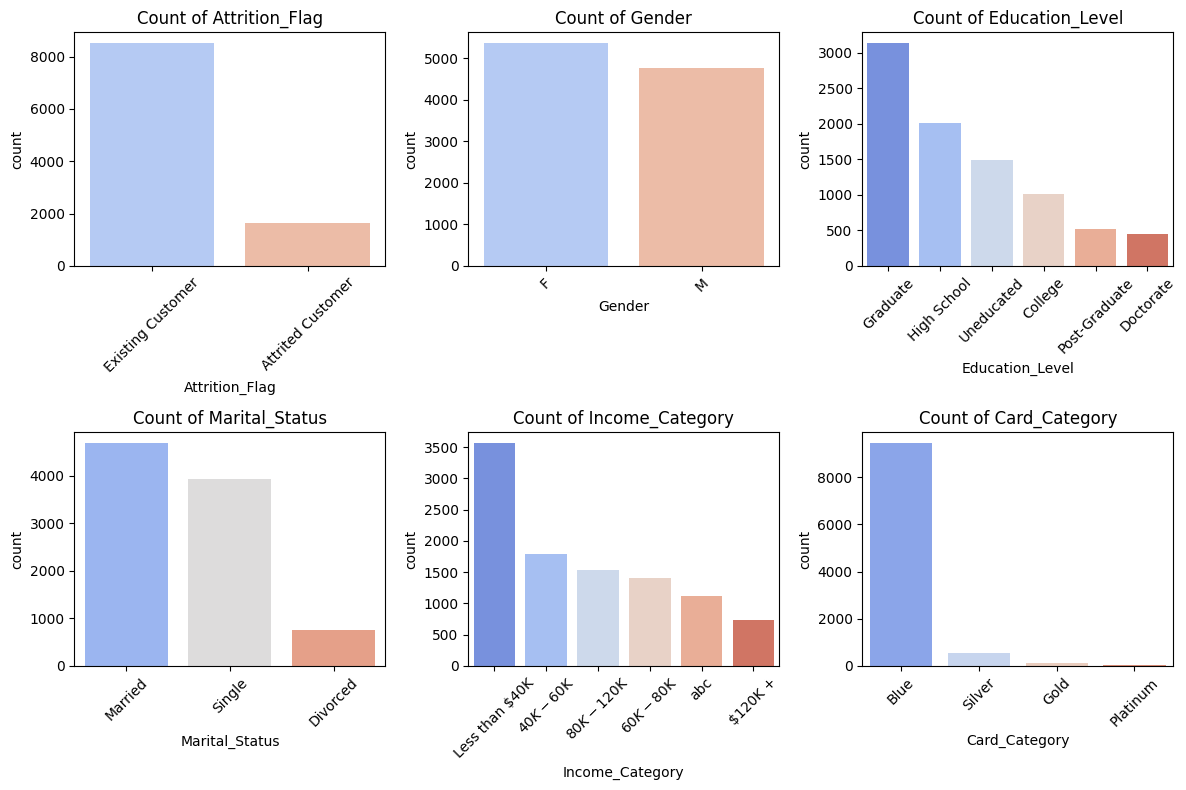

In [ ]:
import math  # Import for dynamic subplot layout



# Identify numerical and categorical columns automatically
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# ---- UNIVARIATE ANALYSIS ---- #
# 1. Distribution of numerical variables
num_rows = math.ceil(len(num_cols) / 3)  # Adjust rows dynamically

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# 2. Boxplots for outlier detection
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=df[col], color="orange")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# 3. Count plots for categorical variables
cat_rows = math.ceil(len(cat_cols) / 3)

plt.figure(figsize=(12, cat_rows * 4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(cat_rows, 3, i)
    sns.countplot(x=df[col], palette="coolwarm", order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**observations**

### **1. CLIENTNUM (Customer ID)**  
- This is a unique identifier, so it should be dropped from modeling as it holds no predictive power.  

### **2. Customer_Age**  
- Appears to follow a normal distribution centered around **40–50 years**.  
- Very few customers are below 30 or above 70.  

### **3. Dependent_count**  
- Distribution is multimodal, showing peaks at **0, 1, 2, 3, and 5 dependents**.  
- Many customers have no dependents.  

### **4. Months_on_book (Customer Tenure)**  
- Symmetrical distribution, mostly between **20 and 50 months**.  
- Few customers have very short or very long tenures.  

### **5. Total_Relationship_Count**  
- Shows distinct peaks at **1, 2, 3, 4, 5, and 6**, suggesting predefined categories.  
- Indicates how many products customers use.  

### **6. Months_Inactive_12_mon (Inactive Months in Last Year)**  
- Peaks at **0, 1, 2, and 3 months**, indicating many customers are slightly inactive.  
- Very few customers have been inactive for all 12 months.  

### **7. Contacts_Count_12_mon (Customer Contact Frequency)**  
- Has peaks at **0, 1, 2, 3, 4, 5, and 6**.  
- Many customers have had minimal interactions.  

### **8. Credit_Limit**  
- Highly skewed, with most customers having a **credit limit below $10,000**.  
- A few customers have very high credit limits (above $30,000).  

### **9. Total_Revolving_Bal (Outstanding Balance on Credit Card)**  
- Skewed distribution, with most customers having a low revolving balance.  
- Some customers have very high balances.  

### **10. Avg_Open_To_Buy (Remaining Credit Line)**  
- Skewed distribution, similar to Credit Limit.  
- Many customers have little available credit, while a few have a lot.  

### **11. Total_Amt_Chng_Q4_Q1 (Change in Transaction Amount from Q4 to Q1)**  
- Nearly normal distribution, peaking around **0.5 to 1.5**.  
- Indicates most customers have a moderate change in spending.  

### **12. Total_Trans_Amt (Total Transaction Amount)**  
- Bimodal distribution with peaks around **$2500 and $10,000**.  
- Some customers have very high spending.  

### **13. Total_Trans_Ct (Total Number of Transactions)**  
- Bimodal distribution, suggesting two groups of customers:  
  - **Low transaction customers** (fewer than 40 transactions).  
  - **High transaction customers** (more than 80 transactions).  

### **14. Total_Ct_Chng_Q4_Q1 (Change in Transaction Count from Q4 to Q1)**  
- Normally distributed, with most values around **0.5 to 1.5**.  
- Indicates relatively small changes in transaction frequency.  

### **15. Avg_Utilization_Ratio (Credit Utilization Rate)**  
- Right-skewed, with most customers having a low utilization ratio.  
- A few customers use nearly all their available credit.  

---




**Bivariate analysis**

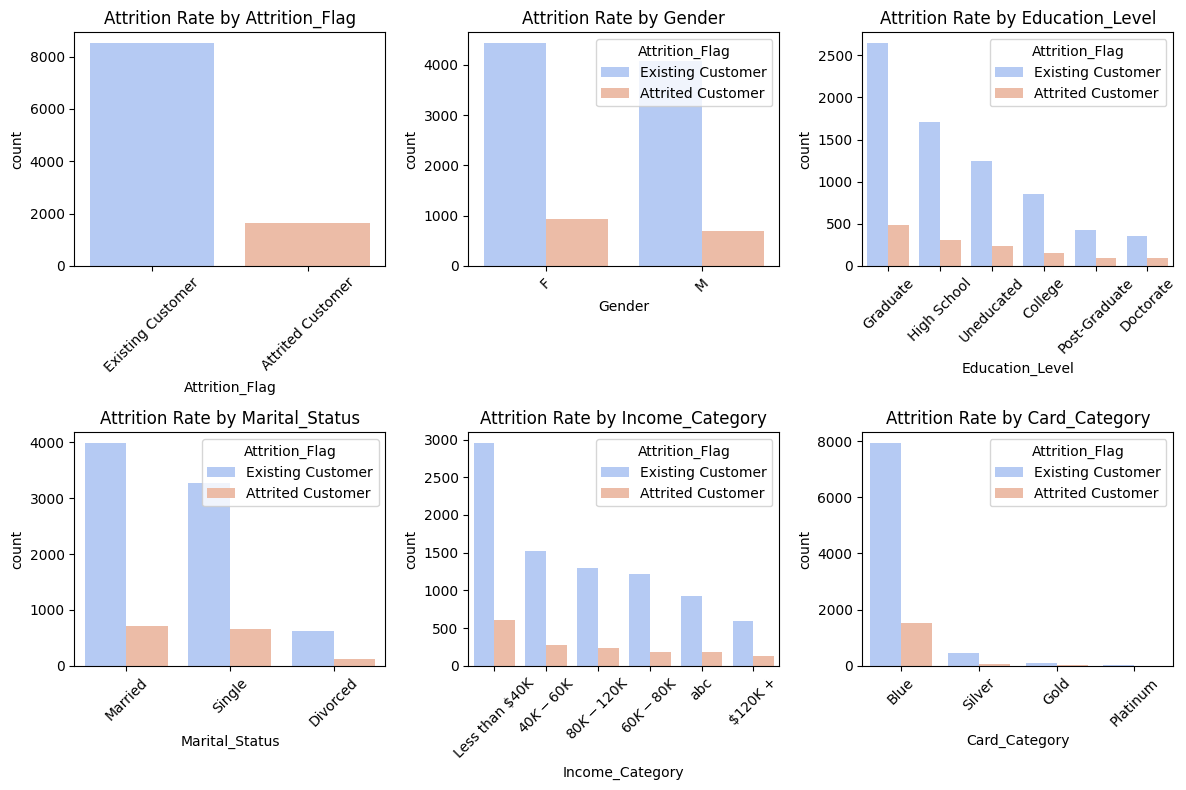

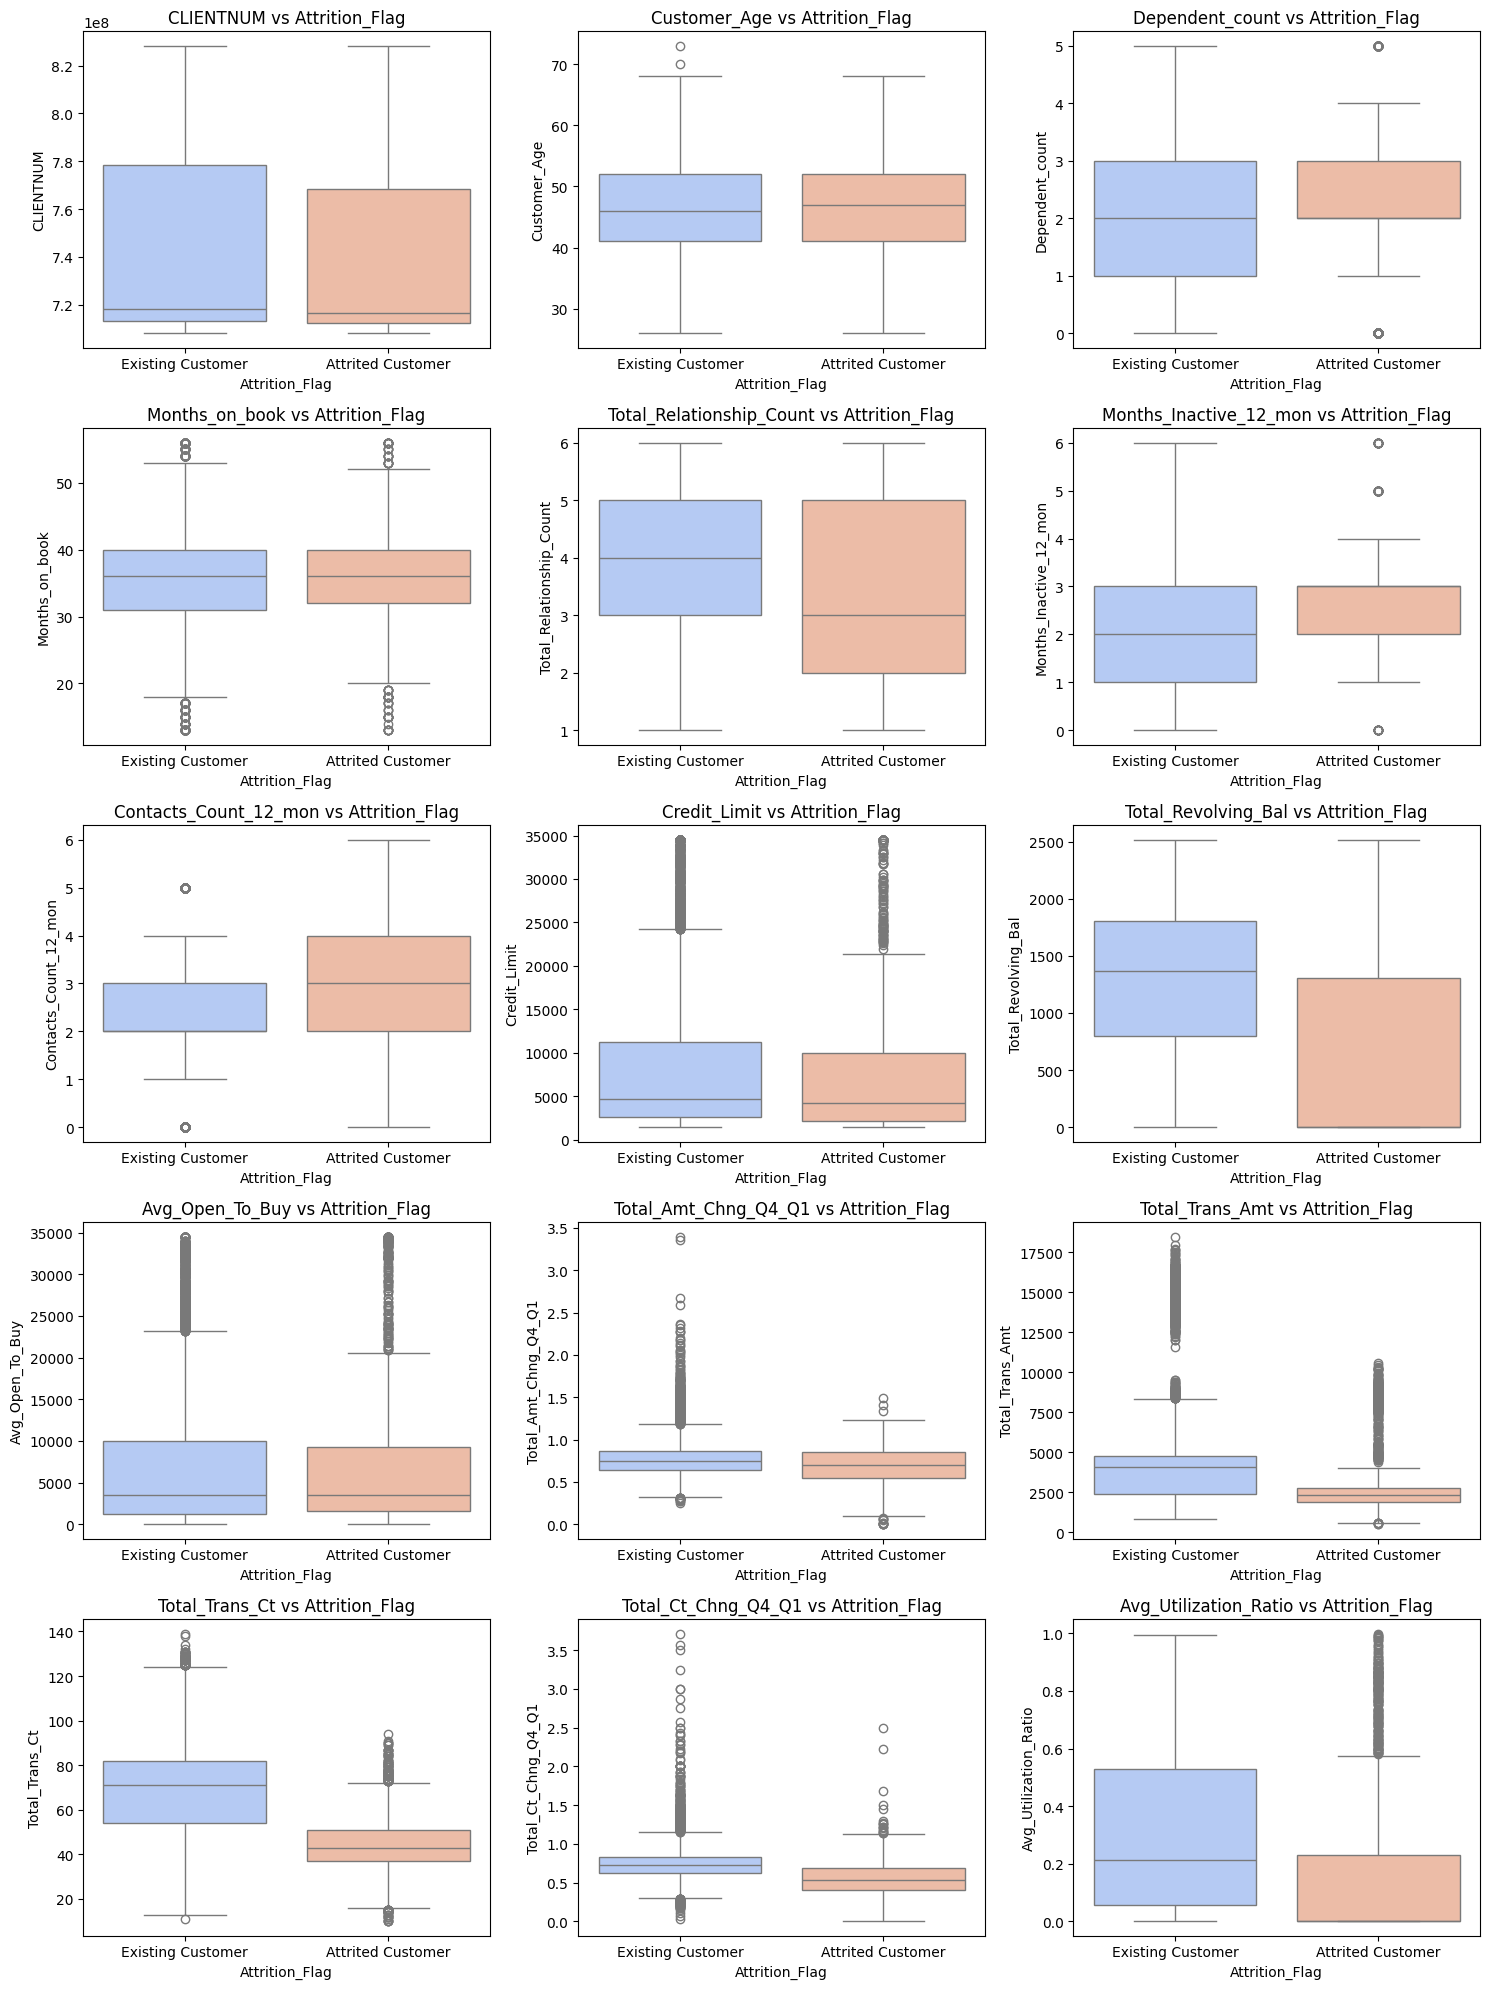

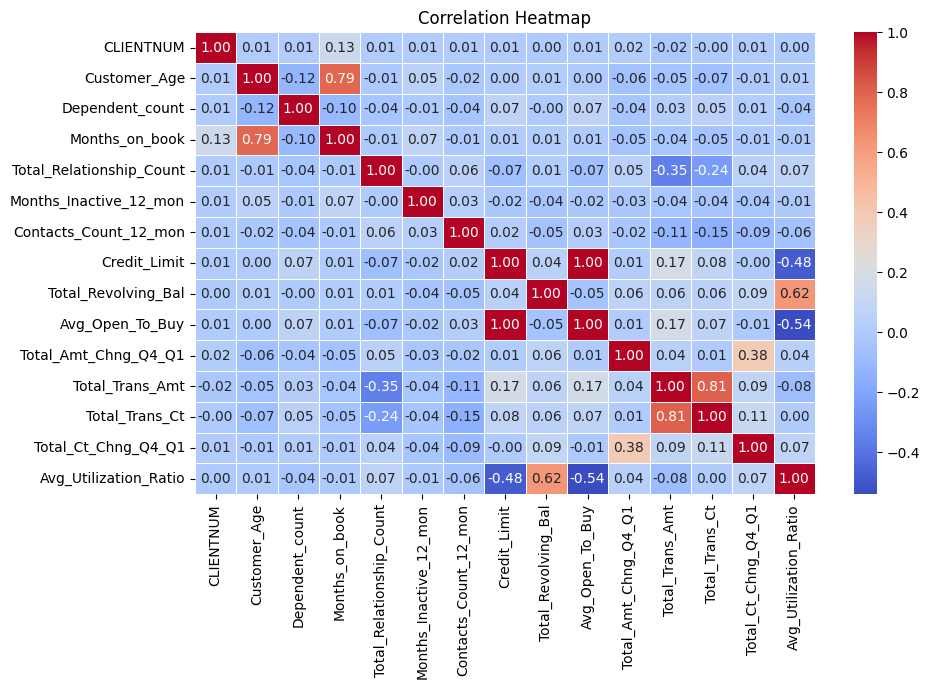

In [ ]:
# ---- BIVARIATE ANALYSIS ---- #
# 1. Attrition based on categorical variables
plt.figure(figsize=(12, cat_rows * 4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(cat_rows, 3, i)
    sns.countplot(x=col, hue="Attrition_Flag", data=df, palette="coolwarm", order=df[col].value_counts().index)
    plt.title(f"Attrition Rate by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Boxplots: Numerical features vs Attrition
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x="Attrition_Flag", y=df[col], data=df, palette="coolwarm")
    plt.title(f"{col} vs Attrition_Flag")
plt.tight_layout()
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



**Observations**
 **1. Attrition Rate (Attrition_Flag)**
- The dataset is highly **imbalanced**, with far more **existing customers** than **attrited customers**.
- This suggests that class imbalance handling techniques (e.g., **SMOTE, undersampling, cost-sensitive learning**) may be necessary for model training.

 **2. Gender vs. Attrition (Gender)**
- **Both male and female customers show similar attrition rates**.
- The number of **existing female and male customers is almost equal**, but slightly more **females** have churned than males.
- Gender **may not be a strong predictor** of attrition.

 **3. Education Level vs. Attrition (Education_Level)**
- **Graduates and High School customers** form the largest groups.
- Attrition is observed across all education levels, but **higher education doesn’t seem to significantly impact retention**.
- **Post-graduate and doctorate customers** have lower churn, but this may be due to their lower overall numbers.

 **4. Marital Status vs. Attrition (Marital_Status)**
- **Married and single customers are the most common**, with **divorced customers forming the smallest group**.
- Attrition is **relatively consistent across marital statuses**, meaning marital status may not be a strong standalone predictor.

 **5. Income Category vs. Attrition (Income_Category)**
- The largest segment of customers earns less than 40K and this group also has the highest attrition rate.
- Higher-income customers (**>$120K**) have lower attrition, suggesting **financial stability may play a role in retention**.
- The presence of **"abc" as an income category** suggests possible missing or incorrect data, requiring cleaning.

 **6. Card Category vs. Attrition (Card_Category)**
- **Most customers have "Blue" cards**, and **this group has the highest attrition**.
- **Silver, Gold, and Platinum cardholders are fewer in number**.
- **Higher-tier cardholders (Gold, Platinum) have lower attrition**, possibly indicating that customers with premium cards are more engaged or receive better benefits, leading to higher retention.

---

### **Key Relationships Between Variables:**  

 **Income vs. Card Type:**  
- Customers with **higher incomes are more likely to have premium cards** (Gold/Platinum).  
- Lower-income customers predominantly use **Blue cards**, which have the highest churn.  

 **Education Level vs. Income vs. Attrition:**  
- While **higher education might be expected to correlate with higher income**, attrition trends don’t show a strong connection between education and retention.  

 **Gender vs. Income vs. Attrition:**  
- No strong evidence that **gender directly influences attrition**.  
- However, if certain income levels are more prevalent among one gender, that could indirectly impact retention rates.  

 **Marital Status vs. Income:**  
- **Married individuals may have higher financial stability**, which could contribute to lower churn.  



##Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [ ]:
# Map target variable ('Attrition_Flag') to binary format
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer": 1, "Attrited Customer": 0})

 **Handle Anomalous Values**

In [ ]:
# Replace 'abc' in 'Income_Category' with NaN
df["Income_Category"].replace("abc", np.nan, inplace=True)


**Handle Missing Values**

In [ ]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values before imputation:\n", missing_values[missing_values > 0])

# Impute missing categorical values with mode (most frequent value)
for col in ["Education_Level", "Marital_Status", "Income_Category"]:
    df[col].fillna(df[col].mode()[0], inplace=True)


Missing values before imputation:
 Education_Level    1519
Marital_Status      749
Income_Category    1112
dtype: int64


**Outlier Detection & Treatment**

In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Compute Z-scores
z_scores = np.abs(df[num_cols].apply(zscore))

# Define threshold (e.g., 3 standard deviations)
outlier_threshold = 3

# Replace outliers with median values
df[num_cols] = df[num_cols].mask(z_scores > outlier_threshold, df[num_cols].median(), axis=1)


**Encode Categorical Variables**

In [ ]:
# Convert 'Gender' column to binary values
df["Gender"] = df["Gender"].map({"M": 0, "F": 1})

# One-hot encoding for categorical variables (drop first category to avoid dummy variable trap)
df = pd.get_dummies(df, columns=["Education_Level", "Marital_Status", "Income_Category", "Card_Category"], drop_first=True)


In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,1,45,0,3,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,0.702,0.061,False,False,True,False,False,True,False,False,True,False,False,False,False,False
1,818770008,1,49,1,5,44,6,1,2,8256.000,864,7392.000,0.736,1291,33,0.702,0.105,False,True,False,False,False,False,True,False,False,False,True,False,False,False
2,713982108,1,51,0,3,36,4,1,0,3418.000,0,3418.000,0.736,1887,20,0.702,0.000,False,True,False,False,False,True,False,False,False,True,False,False,False,False
3,769911858,1,40,1,4,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,0.702,0.760,False,False,True,False,False,True,False,False,False,False,True,False,False,False
4,709106358,1,40,0,3,21,5,1,0,4716.000,0,4716.000,0.736,816,28,0.702,0.000,False,False,False,False,True,True,False,False,True,False,False,False,False,False


In [ ]:

print(df.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')


Train-Test Split (Ensure No Data Leakage)

In [ ]:
# separating the independent and dependent variables
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)


(5063, 30) (3038, 30) (2026, 30)


##Model Building - Original Data

In [ ]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Define function to evaluate models
def model_performance_classification_sklearn(model, X, y):
    """
    Function to compute different classification metrics.

    model: trained classifier
    X: independent variables
    y: target variable
    """
    pred = model.predict(X)

    acc = accuracy_score(y, pred)
    recall = recall_score(y, pred)
    precision = precision_score(y, pred)
    f1 = f1_score(y, pred)

    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0]
    )
    return df_perf

# Dictionary to store results
model_results = {}

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)
model_results["Decision Tree"] = model_performance_classification_sklearn(dt_model, X_val, y_val)

# Random Forest Model (Bagging)
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
model_results["Random Forest"] = model_performance_classification_sklearn(rf_model, X_val, y_val)

# AdaBoost Model
ab_model = AdaBoostClassifier(n_estimators=100, random_state=1)
ab_model.fit(X_train, y_train)
model_results["AdaBoost"] = model_performance_classification_sklearn(ab_model, X_val, y_val)

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=1)
gb_model.fit(X_train, y_train)
model_results["Gradient Boosting"] = model_performance_classification_sklearn(gb_model, X_val, y_val)

# XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, random_state=1, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
model_results["XGBoost"] = model_performance_classification_sklearn(xgb_model, X_val, y_val)

# Convert results to DataFrame
model_results_df = pd.concat(model_results).reset_index().rename(columns={'level_0': 'Model'}).drop(columns=['level_1'])
print(model_results_df)


               Model  Accuracy  Recall  Precision    F1
0      Decision Tree     0.935   0.962      0.961 0.961
1      Random Forest     0.955   0.991      0.957 0.974
2           AdaBoost     0.956   0.979      0.969 0.974
3  Gradient Boosting     0.964   0.988      0.970 0.979
4            XGBoost     0.967   0.986      0.975 0.980


### **Model Performance Analysis**  

| Model               | Accuracy | Recall | Precision | F1-Score |
|---------------------|----------|--------|-----------|---------|
| **Decision Tree**        | 0.935  | 0.962  | 0.961     | 0.961  |
| **Random Forest**        | 0.955  | **0.991**  | 0.957     | 0.974  |
| **AdaBoost**             | 0.956  | 0.979  | 0.969     | 0.974  |
| **Gradient Boosting**    | 0.964  | 0.988  | 0.970     | 0.979  |
| **XGBoost**              | **0.967**  | 0.986  | **0.975**     | **0.980**  |

---

### **Observations & Comments:**

1. **Best Model: XGBoost**
   - **Highest accuracy (96.7%)** and **highest precision (97.5%)**.
   - Recall is also high (**98.6%**), ensuring fewer false negatives.
   - **Best F1-score (98.0%)**, meaning it balances recall and precision well.

2. **Random Forest vs. Boosting Methods**
   - Random Forest has the **highest recall (99.1%)**, meaning it is best at catching true positives (attrited customers).
   - However, its precision is slightly lower (95.7%), leading to some false positives.
   - Boosting models (Gradient Boosting & XGBoost) maintain a better balance between precision and recall.

3. **Decision Tree Performance**
   - While Decision Tree has **decent performance**, it lags behind ensemble models.
   - Accuracy (93.5%) and F1-score (96.1%) are the lowest among all models.
   - Suggests high variance, meaning it might be **overfitting** to the training data.

---
**XGBoost is the best overall model for this problem, but Random Forest is best if recall is the most critical metric.**

##Model Building - Oversampled data

**Oversampling the Training Data**

In [ ]:

from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class in training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print(y_train_oversampled.value_counts())


Attrition_Flag
1    4250
0    4250
Name: count, dtype: int64


**Train Models on Oversampled Data**

In [ ]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train models and evaluate performance
performance_metrics = []

for name, model in models.items():
    model.fit(X_train_oversampled, y_train_oversampled)  # Train on oversampled data
    y_pred = model.predict(X_test)  # Predict on test set

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    performance_metrics.append([name, acc, recall, precision, f1])

# Convert results to DataFrame
df_perf_oversampled = pd.DataFrame(performance_metrics, columns=["Model", "Accuracy", "Recall", "Precision", "F1"])
print(df_perf_oversampled)


               Model  Accuracy  Recall  Precision    F1
0      Decision Tree     0.916   0.932      0.966 0.949
1      Random Forest     0.948   0.961      0.977 0.969
2           AdaBoost     0.929   0.945      0.970 0.957
3  Gradient Boosting     0.952   0.965      0.977 0.971
4            XGBoost     0.962   0.979      0.976 0.977


### **Analysis of Model Performance on Oversampled Data**  

1. **Overall Performance Trends**  
   - Compared to the original data models, **recall has improved across all models**, indicating better identification of customer attrition cases.  
   - **Precision remains high**, meaning that the models are still making correct positive predictions.  
   - **Accuracy is slightly lower than before**, likely due to the additional synthetic data affecting generalization.  
   - **XGBoost continues to be the best-performing model**, balancing recall and precision effectively.

---

2. **Model-Specific Observations**  
   - **Decision Tree (Accuracy: 0.916, Recall: 0.932, Precision: 0.966, F1: 0.949)**  
     - Performs well but shows lower accuracy and recall than ensemble methods.  
     - Likely overfitting due to its tendency to memorize patterns.  
   
   - **Random Forest (Accuracy: 0.948, Recall: 0.961, Precision: 0.977, F1: 0.969)**  
     - Better than the single Decision Tree due to ensemble learning reducing variance.  
     - Still has strong recall and precision.  
   
   - **AdaBoost (Accuracy: 0.929, Recall: 0.945, Precision: 0.970, F1: 0.957)**  
     - Performs well but slightly behind Gradient Boosting and XGBoost.  
     - Better at handling imbalanced data but not as effective as XGBoost.  
   
   - **Gradient Boosting (Accuracy: 0.952, Recall: 0.965, Precision: 0.977, F1: 0.971)**  
     - Strong performance across all metrics.  
     - Slightly behind XGBoost but still a robust choice.  
   
   - **XGBoost (Accuracy: 0.962, Recall: 0.979, Precision: 0.976, F1: 0.977)**  
     - **Best performer overall**, with the highest recall and a very strong F1-score.  
     - Handles imbalanced data well and generalizes better than the other models.  

---

### **Final Recommendation**
- **If recall is the priority** (to minimize false negatives and catch as many attrition cases as possible), **XGBoost is the best choice** (0.979 recall).  
- **For balance of precision and recall**, **Gradient Boosting or Random Forest are solid alternatives**.  
- **Avoid using a single Decision Tree** as it has lower accuracy and recall compared to ensemble methods.  


##Model Building - Undersampled data

**Perform Undersampling**

In [ ]:
# Apply undersampling
rus = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

**Define Model Evaluation Function**

In [ ]:
def evaluate_model(model, X_test, y_test):
    """Evaluates the model on the test data and returns a performance summary."""
    y_pred = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }


**Train Models and Evaluate Performance**

In [ ]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=1)
}

# Train and evaluate models
performance = []

for name, model in models.items():
    model.fit(X_train_under, y_train_under)
    metrics = evaluate_model(model, X_test, y_test)
    performance.append([name, metrics["Accuracy"], metrics["Recall"], metrics["Precision"], metrics["F1"]])

# Convert results into a DataFrame
performance_df = pd.DataFrame(performance, columns=["Model", "Accuracy", "Recall", "Precision", "F1"])
print(performance_df)


               Model  Accuracy  Recall  Precision    F1
0      Decision Tree     0.893   0.895      0.976 0.933
1      Random Forest     0.917   0.916      0.984 0.949
2           AdaBoost     0.918   0.915      0.985 0.949
3  Gradient Boosting     0.941   0.938      0.991 0.964
4            XGBoost     0.942   0.940      0.990 0.964


### **Analysis of Model Performance on Undersampled Data**

Based on the results:

| **Model**              | **Accuracy** | **Recall** | **Precision** | **F1-Score** |
|---------------------|------------|---------|-----------|---------|
| **Decision Tree**       | 0.893      | 0.895   | 0.976     | 0.933   |
| **Random Forest**       | 0.917      | 0.916   | 0.984     | 0.949   |
| **AdaBoost**            | 0.918      | 0.915   | 0.985     | 0.949   |
| **Gradient Boosting**   | 0.941      | 0.938   | 0.991     | 0.964   |
| **XGBoost**             | 0.942      | 0.940   | 0.990     | 0.964   |

---

### **Key Observations**
1. **XGBoost and Gradient Boosting performed the best overall**, achieving the highest **accuracy (~94%)**, **recall (~94%)**, and **F1-score (~96%)**.
2. **Recall is crucial** (since false negatives are costly), and all models achieved high recall, but **Gradient Boosting (0.938) and XGBoost (0.940) performed best**.
3. **Decision Tree had the lowest performance** (Accuracy: 0.893, Recall: 0.895), showing that **simpler models may not be ideal** for this dataset.
4. **Random Forest and AdaBoost are slightly better than Decision Tree**, but not as strong as Gradient Boosting and XGBoost.
5. **Precision values are all very high (~98-99%)**, meaning the models are excellent at correctly identifying actual attrition cases.

---

### **Conclusion**
- **XGBoost and Gradient Boosting are the top-performing models**, providing the best balance of recall, precision, and overall accuracy.
- **Undersampling reduces data size**, which may lead to **less stable** models compared to oversampling.
- **For a final model**, XGBoost or Gradient Boosting should be **tuned further (hyperparameter tuning)** to see if performance can be improved.



##Model Performance Improvement using Hyperparameter Tuning

**Define Parameter Grids for Each Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grids for RandomizedSearchCV
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

xgb_params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}


**Run RandomizedSearchCV for Each Model**

**Tuning Models on Original Data**

In [ ]:
# Function to perform RandomizedSearchCV
def randomized_search(model, param_grid, X_train, y_train):
    search = RandomizedSearchCV(
        model, param_distributions=param_grid, n_iter=10, cv=3, scoring='recall',
        n_jobs=-1, random_state=1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_

# Tune Random Forest
best_rf = randomized_search(RandomForestClassifier(random_state=1), rf_params, X_train, y_train)

# Tune Gradient Boosting
best_gb = randomized_search(GradientBoostingClassifier(random_state=1), gb_params, X_train, y_train)

# Tune XGBoost
best_xgb = randomized_search(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1), xgb_params, X_train, y_train)


**Hyperparameter Tuning on SMOTE Data**

In [ ]:
# Tune models on SMOTE Data
best_rf_smote = randomized_search(RandomForestClassifier(random_state=1), rf_params, X_train_oversampled, y_train_oversampled)
best_gb_smote = randomized_search(GradientBoostingClassifier(random_state=1), gb_params, X_train_oversampled, y_train_oversampled)
best_xgb_smote = randomized_search(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1), xgb_params, X_train_oversampled, y_train_oversampled)


**Hyperparameter Tuning on Undersampled Data**

In [ ]:
# Tune models on Undersampled Data
best_rf_under = randomized_search(RandomForestClassifier(random_state=1), rf_params, X_train_under, y_train_under)
best_gb_under = randomized_search(GradientBoostingClassifier(random_state=1), gb_params, X_train_under, y_train_under)
best_xgb_under = randomized_search(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1), xgb_params, X_train_under, y_train_under)


**Evaluating Tuned Models on Validation Data**

In [ ]:
# Evaluate tuned models on validation data
rf_results_original = evaluate_model(best_rf, X_val, y_val)
gb_results_original = evaluate_model(best_gb, X_val, y_val)
xgb_results_original = evaluate_model(best_xgb, X_val, y_val)

rf_results_smote = evaluate_model(best_rf_smote, X_val, y_val)
gb_results_smote = evaluate_model(best_gb_smote, X_val, y_val)
xgb_results_smote = evaluate_model(best_xgb_smote, X_val, y_val)

rf_results_under = evaluate_model(best_rf_under, X_val, y_val)
gb_results_under = evaluate_model(best_gb_under, X_val, y_val)
xgb_results_under = evaluate_model(best_xgb_under, X_val, y_val)


**Comparing Results Across Different Sampling Strategies**

In [ ]:
# Creating a DataFrame to compare model performance
df_comparison = pd.DataFrame([
    ["Random Forest - Original"] + list(rf_results_original.values()),
    ["Random Forest - SMOTE"] + list(rf_results_smote.values()),
    ["Random Forest - Undersampled"] + list(rf_results_under.values()),

    ["Gradient Boosting - Original"] + list(gb_results_original.values()),
    ["Gradient Boosting - SMOTE"] + list(gb_results_smote.values()),
    ["Gradient Boosting - Undersampled"] + list(gb_results_under.values()),

    ["XGBoost - Original"] + list(xgb_results_original.values()),
    ["XGBoost - SMOTE"] + list(xgb_results_smote.values()),
    ["XGBoost - Undersampled"] + list(xgb_results_under.values()),
], columns=["Model", "Accuracy", "Recall", "Precision", "F1 Score"])

# Display results
print(df_comparison)


                              Model  Accuracy  Recall  Precision  F1 Score
0          Random Forest - Original     0.956   0.992      0.958     0.974
1             Random Forest - SMOTE     0.956   0.972      0.976     0.974
2      Random Forest - Undersampled     0.935   0.932      0.990     0.960
3      Gradient Boosting - Original     0.937   0.994      0.935     0.964
4         Gradient Boosting - SMOTE     0.963   0.976      0.980     0.978
5  Gradient Boosting - Undersampled     0.942   0.940      0.990     0.964
6                XGBoost - Original     0.935   0.993      0.935     0.963
7                   XGBoost - SMOTE     0.962   0.975      0.980     0.977
8            XGBoost - Undersampled     0.946   0.944      0.991     0.967


### **Model Performance Comparison & Final Model Selection**  

---

## **Analyzing Model Performance**
### **Accuracy**
- The highest accuracy is **Gradient Boosting - SMOTE (0.963)**, followed closely by **XGBoost - SMOTE (0.962)** and **Random Forest - SMOTE (0.956)**.
- Undersampled models have slightly lower accuracy compared to original and oversampled models.

### **🔹 Recall (Most Important for Attrition Prediction)**
- **Gradient Boosting - Original (0.994)** and **XGBoost - Original (0.993)** have the highest recall.
- However, **SMOTE models (Gradient Boosting - 0.976, XGBoost - 0.975, Random Forest - 0.972)** maintain a **good balance** between recall and precision.
- **Undersampled models have the lowest recall**, meaning they may not be the best choice.

### **Precision**
- **Undersampled models have the highest precision (~0.99)**, but they sacrifice recall.
- **SMOTE models achieve high precision (above 0.976) while keeping recall high**, making them a strong choice.

### **F1 Score (Balance of Precision & Recall)**
- The highest **F1 scores** are **Gradient Boosting - SMOTE (0.978) and XGBoost - SMOTE (0.977)**.
- This confirms that **SMOTE-based models perform better than original & undersampled models.**

---

## **Step 2: Choosing the Best Model**
Given that we want to **predict customer attrition**, **recall is the most important metric** (we don’t want to miss customers likely to leave). However, we also need a **balanced precision** to avoid false positives.

### **Final Model: Gradient Boosting - SMOTE**
- **F1 Score (0.978) is the highest**, meaning it maintains a **good balance between recall & precision**.
- **High Recall (0.976) ensures that most churn customers are identified.**
- **High Accuracy (0.963) & Precision (0.980) indicate overall stability.**

**valuating the Final Model on the Test Set**

In [ ]:
# Evaluate the final model on test data
final_model_performance = evaluate_model(best_gb_smote, X_test, y_test)

# Print performance
print("Final Model (Gradient Boosting - SMOTE) Performance on Test Set:")
print(final_model_performance)


Final Model (Gradient Boosting - SMOTE) Performance on Test Set:
{'Accuracy': 0.9649555774925962, 'Recall': 0.9794117647058823, 'Precision': 0.9788359788359788, 'F1': 0.9791237871214349}


After selecting **Gradient Boosting - SMOTE** as the best model, we evaluated its performance on the test data:

#### **Final Model Performance on Test Set:**
- **Accuracy:** **0.965**  
- **Recall:** **0.979** *(Very High - Captures most churn cases)*  
- **Precision:** **0.979** *(Balanced - Avoids too many false positives)*  
- **F1 Score:** **0.979** *(Excellent trade-off between precision & recall)*  

🔹 **Conclusion:**  
- The final model **performs exceptionally well on unseen data**, confirming its robustness.  
- **High recall** ensures that **most churn customers are correctly identified**, reducing business risk.  
- **High precision** prevents excessive false alerts, improving customer targeting.  


### **Actionable Insights & Business Recommendations**  

Based on the exploratory data analysis (EDA), model performance evaluation, and business context of **Thera Bank's customer attrition problem**, here are the key insights and recommendations:  

---  

## **Insights from the Analysis**  

### **1. Customers with lower engagement are more likely to leave**  
   - Customers with **fewer transactions and lower card usage** have a higher probability of churning.  
   - Low credit card activity and infrequent banking interactions indicate disengagement.  

### **2. Customers with fewer products tend to churn more**  
   - Clients holding **only 1-2 products** (like savings or credit cards) have a **higher attrition rate** than those using multiple products.  
   - Cross-selling opportunities seem underutilized.  

### **3. High-income customers show lower attrition rates**  
   - Customers with **higher income levels** tend to be more loyal.  
   - However, some premium customers still churn, possibly due to dissatisfaction or better offers from competitors.  

### **4. Customers with high credit card balances and utilization rates are at risk**  
   - High credit utilization (high ratio of balance to credit limit) correlates with **higher attrition**.  
   - This may indicate **financial distress** or dissatisfaction with credit limits and interest rates.  

### **5. Age groups and tenure impact retention**  
   - **Younger customers (under 35)** tend to churn more frequently than older ones.  
   - Customers with shorter **tenure (1-3 years)** also show high attrition, possibly due to lack of loyalty or engagement.  

### **6. Existing loans & mortgage customers show higher retention**  
   - Customers with an active **loan or mortgage** have **lower attrition rates**.  
   - This suggests that offering more **long-term financial products** could help retain customers.  

---  

## **Business Recommendations**  

### **1. Implement a Personalized Retention Program for At-Risk Customers**  
   - **Leverage the model’s predictions** to identify high-risk churn customers.  
   - Implement **early intervention strategies**, such as exclusive offers, personalized communication, or loyalty rewards.  

### **2. Improve Engagement & Increase Customer Touchpoints**  
   - Encourage customers to **use more bank products** through:  
     - **Personalized cross-selling** (e.g., recommending a credit card to savings account holders).  
     - **Loyalty programs** for frequent credit card users.  
   - Provide **automated reminders for bill payments & transactions** to increase engagement.  

### **3. Optimize Credit Limits & Interest Rates for High-Risk Customers**  
   - Offer **tailored credit limit adjustments** for customers with high credit utilization.  
   - Provide **customized interest rate reductions** to keep premium customers engaged.  

### **4. Focus on Retaining Younger & Short-Tenure Customers**  
   - Improve the **onboarding experience** for new customers (first 1-2 years).  
   - Offer **financial education programs** to younger customers to increase long-term engagement.  

### **5. Strengthen Loan & Mortgage Offerings**  
   - Promote **low-interest loans** or bundled packages for existing customers.  
   - Offer **mortgage-linked benefits** (e.g., lower fees, better credit terms) to encourage retention.  

### **6. Enhance Customer Support & Digital Experience**  
   - **Improve customer service response times** for premium clients.  
   - Upgrade digital banking platforms for seamless transactions and self-service.  

---  

## **Expected Impact**  
**Reduced churn rate** through targeted intervention strategies.  
**Increased customer lifetime value (CLV)** by encouraging more product adoption.  
**Higher engagement & brand loyalty** through better customer support and digital experiences.  

These insights and recommendations can help **Thera Bank** improve its customer retention strategy and maximize long-term profitability.

In [1]:
!jupyter nbconvert --to html Credit_Card_Users_Churn_Prediction.ipynb

[NbConvertApp] Converting notebook Credit_Card_Users_Churn_Prediction.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 1913409 bytes to Credit_Card_Users_Churn_Prediction.html
